### Reading the market data of BAJAJFINSV stock and preparing a training dataset and validation dataset.

In [280]:
import pandas as pd
import numpy as np

In [281]:
pd.set_option('display.max_columns', 100)

In [282]:
df=pd.read_csv('BAJFINANCE.csv')

In [283]:
df.set_index('Date',inplace=True)
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


#### Plotting the target variable VWAP over time

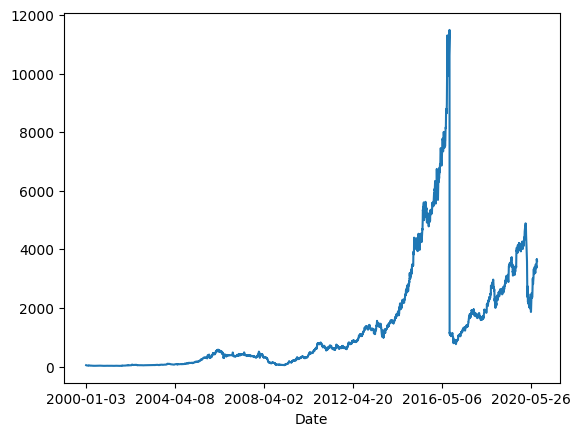

In [284]:
df['VWAP'].plot();

### Data Pre-Processing

In [285]:
df.shape

(5070, 14)

In [286]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [287]:
df.dropna(inplace=True)

In [288]:
df.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [289]:
df.shape

(2291, 14)

In [290]:
data=df.copy()

In [291]:
data.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [292]:
lag_features = ['High', 'Low', 'Volume', 'Turnover', 'Trades']
window1 = 3
window2 = 7

In [293]:
for feature in lag_features:
    data[feature+'rolling_mean_3']=data[feature].rolling(window=window1).mean()
    data[feature+'rolling_mean_7']=data[feature].rolling(window=window2).mean()

In [294]:
for feature in lag_features:
    data[feature+'rolling_std_3']=data[feature].rolling(window=window1).std()
    data[feature+'rolling_std_7']=data[feature].rolling(window=window2).std()

In [295]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Highrolling_mean_3,Highrolling_mean_7,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Turnoverrolling_mean_3,Turnoverrolling_mean_7,Tradesrolling_mean_3,Tradesrolling_mean_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,4.322621e+11,1416.0,3427.0,0.4971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,1.761205e+11,432.0,1718.0,0.6204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,3.214631e+12,135.0,50912.0,0.9900,637.733333,NaN,618.666667,NaN,20363.333333,NaN,1.274338e+12,NaN,661.000000,NaN,1.201388,NaN,2.309401,NaN,26980.871860,NaN,1.685217e+12,NaN,670.500559,NaN
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,3.354910e+11,268.0,4312.0,0.7918,639.233333,NaN,617.116667,NaN,19880.666667,NaN,1.242081e+12,NaN,278.333333,NaN,1.625833,NaN,4.994080,NaN,27352.695339,NaN,1.710136e+12,NaN,148.769396,NaN
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,3.700840e+11,273.0,4073.0,0.6799,634.250000,NaN,611.783333,NaN,20954.666667,NaN,1.306735e+12,NaN,225.333333,NaN,9.062422,NaN,8.008797,NaN,26391.221653,NaN,1.652377e+12,NaN,78.270897,NaN


In [296]:
data.shape

(2291, 34)

In [297]:
data.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        2
Highrolling_mean_7        6
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Volumerolling_mean_3      2
Volumerolling_mean_7      6
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
Tradesrolling_mean_3      2
Tradesrolling_mean_7      6
Highrolling_std_3         2
Highrolling_std_7         6
Lowrolling_std_3          2
Lowrolling_std_7          6
Volumerolling_std_3       2
Volumerolling_std_7       6
Turnoverrolling_std_3     2
Turnoverrolling_std_7     6
Tradesrolling_std_3       2
Tradesrolling_std_7       6
dtype: int64

In [298]:
data.dropna(inplace=True)

In [299]:
ind_features = [
    i for i in data.columns if "rolling_mean_3" in i or "rolling_mean_7" in i or "rolling_std_3" in i or "rolling_std_7" in i]

# ind_features = ['Highrolling_mean_3', 'Highrolling_mean_7',
#                 'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
#                 'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
#                 'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
#                 'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
#                 'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
#                 'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
#                 'Tradesrolling_std_3', 'Tradesrolling_std_7']

In [300]:
training_data=data[0:1800]
test_data=data[1800:]

In [301]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [302]:
from statsmodels.tsa.arima.model import ARIMA
p = 1  # AR (Auto-Regressive) derecesi
d = 1  # Differencing derecesi (1, çünkü birinci farkı aldık)
q = 1  # MA (Moving Average) derecesi


# Manuel olarak ARIMA modelini tanımlayın
model = ARIMA(training_data['VWAP'], order=(
    p, d, q), exog=training_data[ind_features])

# Modeli eğitin
model_fit = model.fit()

# Test verileri ile tahmin yapın
forecast = model_fit.forecast(
    steps=len(test_data), exog=test_data[ind_features])

In [303]:
# model = auto_arima(
#     y=training_data['VWAP'], exogenous=training_data[ind_features], trace=True)
# model.fit(training_data['VWAP'], training_data[ind_features])
# forecast = model.predict(n_periods=len(test_data), exogenous=test_data[ind_features])

In [304]:
test_data['Forecast_ARIMA']=np.array(forecast)

In [261]:
test_data['Forecast_ARIMA']=forecast

<Axes: xlabel='Date'>

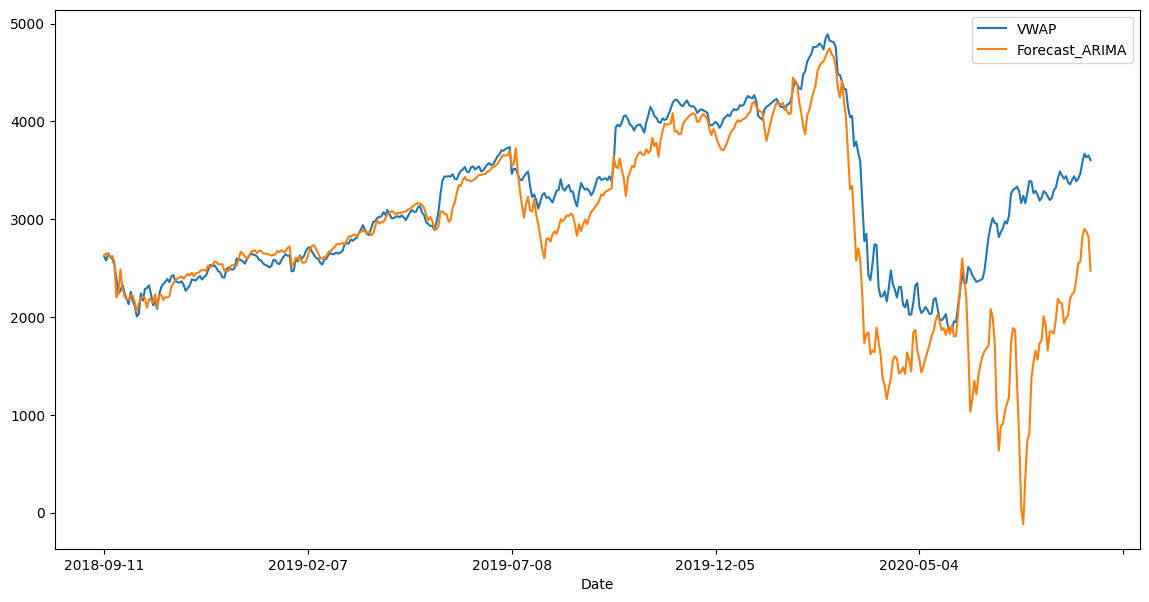

In [306]:
test_data[['VWAP','Forecast_ARIMA']].plot(figsize=(14,7))

#### The Auto ARIMA model seems to do a fairly good job in predicting the stock price

#### Checking Accuracy of our model

In [307]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [308]:
np.sqrt(mean_squared_error(test_data['VWAP'],test_data['Forecast_ARIMA']))

630.6961615454959

In [309]:
mean_absolute_error(test_data['VWAP'],test_data['Forecast_ARIMA'])

361.5409238264313